# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

# Tasks, Part 1

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head(2)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


In [4]:
df.Cylinder.value_counts()

4    394
6    310
8    100
Name: Cylinder, dtype: int64

In [5]:
df.Liter.value_counts()

2.2    190
3.8    160
3.5     80
4.6     60
1.6     60
2.0     60
2.3     50
3.6     30
1.8     30
5.7     20
6.0     20
3.1     10
2.8     10
3.4     10
3.0     10
2.5      4
Name: Liter, dtype: int64

In [6]:
df.isna().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


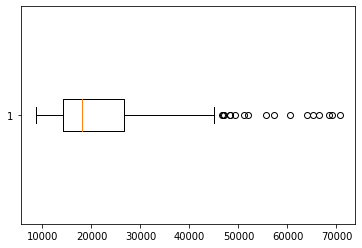

In [8]:
plt.boxplot(df["Price"],vert=False)
plt.show()

In [9]:
df.corr().loc["Price","Mileage"]

-0.14305050619794857

## The correlation is very low for Price vs Mileage

Text(0, 0.5, 'Price')

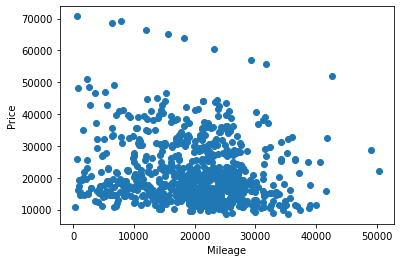

In [10]:
plt.scatter(df["Mileage"],df["Price"])
plt.xlabel("Mileage")
plt.ylabel("Price")

In [11]:
print(df["Price"].corr(np.power(df["Mileage"],0.5)))
print(df["Price"].corr(np.power(df["Mileage"],2)))
print(df["Price"].corr(np.power(df["Mileage"],3)))
print(df["Price"].corr(np.log(df["Mileage"])))

-0.1493163339535272
-0.11723217836087654
-0.08501764636557022
-0.14542389162060157


## The correlation is very low for Price vs Mileage even after transformation
## So with mileage we cant predict price accurately

In [12]:
q3 = df.Price.quantile(0.75)
q1 = df.Price.quantile(0.25)
iqr = q3-q1
ut = q3+(1.5*iqr)
lt = q1-(1.5*iqr)
lt,ut

(-4393.290277667038, 45383.68078365926)

In [13]:
df.Price = df.Price.clip(0,ut)

Text(0, 0.5, 'Price')

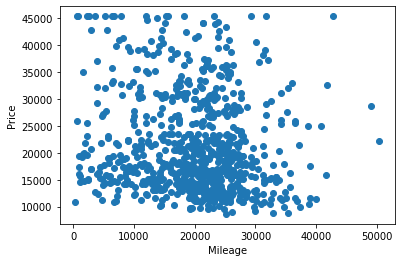

In [14]:
plt.scatter(df["Mileage"],df["Price"])
plt.xlabel("Mileage")
plt.ylabel("Price")

In [15]:
q3 = df.Mileage.quantile(0.75)
q1 = df.Mileage.quantile(0.25)
iqr = q3-q1
ut = q3+(1.5*iqr)
lt = q1-(1.5*iqr)
lt,ut

(-1260.75, 41097.25)

In [16]:
df.Mileage = df.Mileage.clip(0,ut)

Text(0, 0.5, 'Price')

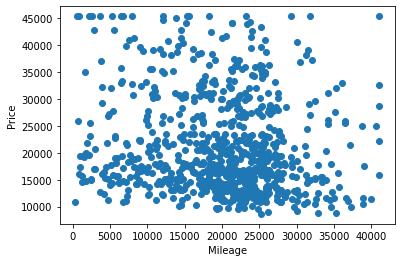

In [17]:
plt.scatter(df["Mileage"],df["Price"])
plt.xlabel("Mileage")
plt.ylabel("Price")

In [18]:
print(df["Price"].corr(np.power(df["Mileage"],0.5)))
print(df["Price"].corr(np.power(df["Mileage"],2)))
print(df["Price"].corr(np.power(df["Mileage"],3)))
print(df["Price"].corr(np.log(df["Mileage"])))

-0.13957718418050452
-0.12313523069438308
-0.10062750245695229
-0.12853461560846144


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [20]:
X = df.Mileage.values.reshape(-1,1)
y = df.Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
"X_train.shape",X_train.shape,"X_test.shape",X_test.shape,"y_train.shape",y_train.shape,"y_test.shape",y_test.shape

('X_train.shape',
 (643, 1),
 'X_test.shape',
 (161, 1),
 'y_train.shape',
 (643,),
 'y_test.shape',
 (161,))

In [22]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
print("Slope(m): ",regressor.coef_)
print("Intercept(c): ",regressor.intercept_)

Slope(m):  [-0.19258915]
Intercept(c):  24647.238348697723


In [24]:
print("R2-Score",regressor.score(X_test,y_test))

R2-Score -0.04162447501765887


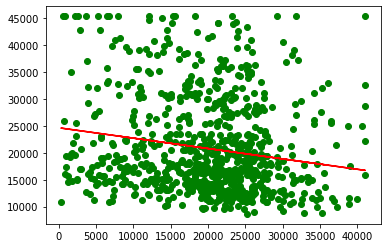

In [25]:
plt.scatter(X, y, color='Green')
plt.plot(X, regressor.predict(X), color='Red')
plt.show()

In [26]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     15.80
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           7.68e-05
Time:                        22:02:21   Log-Likelihood:                -8455.7
No. Observations:                 804   AIC:                         1.692e+04
Df Residuals:                     802   BIC:                         1.692e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.416e+04    832.536     29.022      0.0



## We cant predict price with mileage alone as correlation and r2-score are both low

# Tasks, Part 2

# mileage, cylinders, liters, doors, cruise, sound, and leather

In [27]:
df.head(2)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


In [28]:
df.Cylinder.value_counts()

4    394
6    310
8    100
Name: Cylinder, dtype: int64

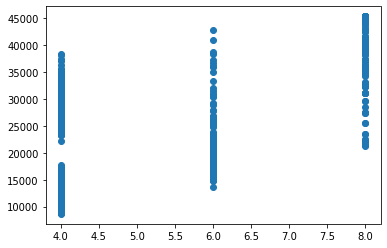

In [29]:
plt.scatter(df["Cylinder"],df["Price"])
plt.show()

Cylinder
4    17862.564874
6    20081.395841
8    37013.155198
Name: Price, dtype: float64


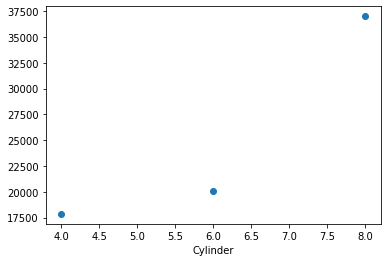

In [30]:
print(df.groupby("Cylinder").Price.mean())
df.groupby("Cylinder").Price.mean().plot(style="o")
plt.show()

In [31]:
df.Liter.value_counts()

2.2    190
3.8    160
3.5     80
4.6     60
1.6     60
2.0     60
2.3     50
3.6     30
1.8     30
5.7     20
6.0     20
3.1     10
2.8     10
3.4     10
3.0     10
2.5      4
Name: Liter, dtype: int64

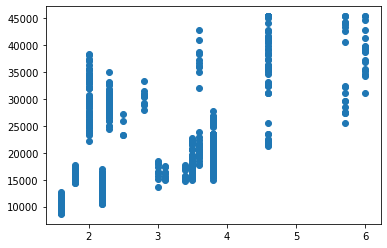

In [32]:
plt.scatter(df.Liter,df.Price)
plt.show()

Liter
1.6    10752.833305
1.8    15881.386094
2.0    29968.972727
2.2    13441.277078
2.3    29288.283553
2.5    24960.948265
2.8    30455.144774
3.0    16550.926211
3.1    15989.528107
3.4    16238.093335
3.5    17788.263153
3.6    26150.134403
3.8    20158.316888
4.6    36511.647481
5.7    36526.643889
6.0    39004.189656
Name: Price, dtype: float64


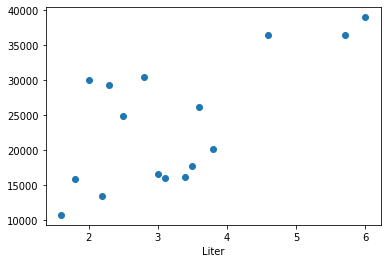

In [33]:
print(df.groupby("Liter").Price.mean())
df.groupby("Liter").Price.mean().plot(style="o")
plt.show()

In [34]:
df.Doors.value_counts()

4    614
2    190
Name: Doors, dtype: int64

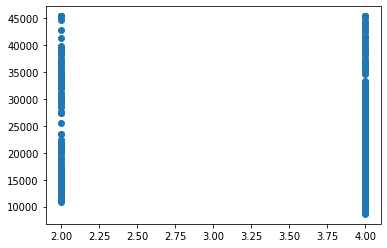

In [35]:
plt.scatter(df.Doors,df.Price)
plt.show()

Doors
2    22867.235455
4    20553.133639
Name: Price, dtype: float64


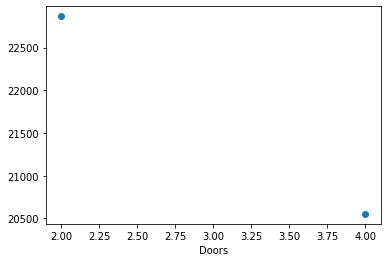

In [36]:
print(df.groupby("Doors").Price.mean())
df.groupby("Doors").Price.mean().plot(style="o")
plt.show()

## Doors and Price is not having high mean difference

In [37]:
df.Cruise.value_counts()

1    605
0    199
Name: Cruise, dtype: int64

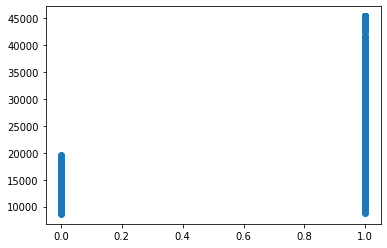

In [38]:
plt.scatter(df.Cruise,df.Price)
plt.show()

Cruise
0    13921.865667
1    23461.070286
Name: Price, dtype: float64


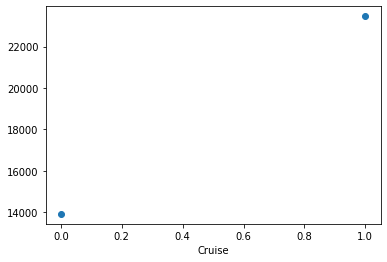

In [39]:
print(df.groupby("Cruise").Price.mean())
df.groupby("Cruise").Price.mean().plot(style="o")
plt.show()

In [40]:
df.Sound.value_counts()

1    546
0    258
Name: Sound, dtype: int64

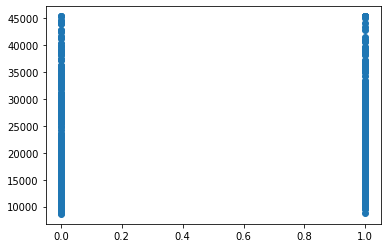

In [41]:
plt.scatter(df.Sound,df.Price)
plt.show()

Sound
0    23064.072543
1    20171.919551
Name: Price, dtype: float64


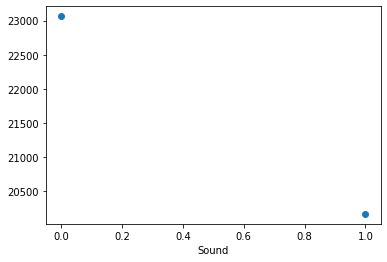

In [42]:
print(df.groupby("Sound").Price.mean())
df.groupby("Sound").Price.mean().plot(style="o")
plt.show()

## Sound and Price is not having high mean difference

In [43]:
df.Leather.value_counts()

1    582
0    222
Name: Leather, dtype: int64

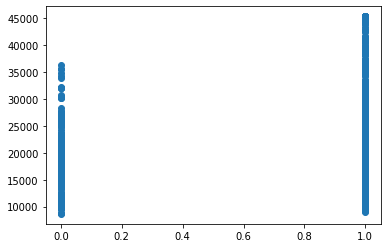

In [44]:
plt.scatter(df.Leather,df.Price)
plt.show()

Leather
0    18828.775928
1    21966.341125
Name: Price, dtype: float64


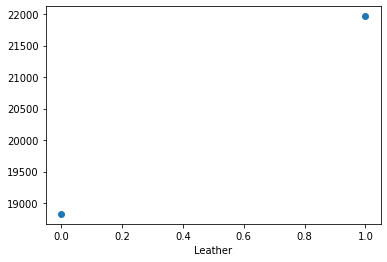

In [45]:
print(df.groupby("Leather").Price.mean())
df.groupby("Leather").Price.mean().plot(style="o")
plt.show()

## Leather and Price is not having high mean difference

In [46]:
X = df[["Mileage","Sound","Doors","Leather","Cylinder","Cruise"]].values #,"Liter"
y = df["Price"].values

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
regressor.intercept_

7506.145770388564

In [50]:
regressor.coef_

array([-1.52787509e-01, -2.00623954e+03, -1.10360543e+03,  2.94135136e+03,
        2.84550149e+03,  6.47425611e+03])

In [51]:
print("R2-score: ",regressor.score(X_test,y_test))

R2-score:  0.4322575361611841


In [57]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     112.1
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          2.00e-102
Time:                        22:02:55   Log-Likelihood:                -8217.5
No. Observations:                 804   AIC:                         1.645e+04
Df Residuals:                     797   BIC:                         1.648e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7252.7433   1601.181      4.530      0.0

In [58]:
df.head(2)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


In [59]:
# plt.scatter(X.Cylinder, y, color='Green')
# plt.plot(X, regressor.predict(X), color='Red')
# plt.show()

In [55]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [60]:
df.dtypes

Price       float64
Mileage     float64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object